In [44]:
import numpy as np
import pandas as pd
import gudhi as gd
import matplotlib.pyplot as plt 
import gudhi.representations

In [76]:
num_points = 2000
r = 2

In [79]:
X = np.empty([num_points, 2])
x, y = np.random.uniform(), np.random.uniform()
for i in range(num_points):
    X[i,:] = [x, y]
    x = (X[i,0] + r * X[i,1] * (1-X[i,1])) % 1.
    y = (X[i,1] + r * x * (1-x)) % 1.

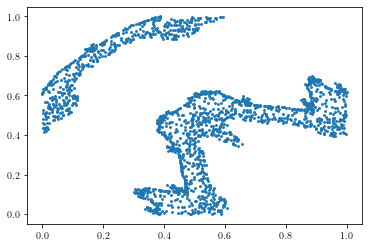

In [80]:
plt.scatter(X[:,0], X[:, 1], s=3.5)
plt.show()

In [81]:
# Persistence diagram
rips_complex_X = gd.AlphaComplex(points = X)
simplex_tree_X = rips_complex_X.create_simplex_tree()

In [83]:
dgmX = simplex_tree_X.persistence()

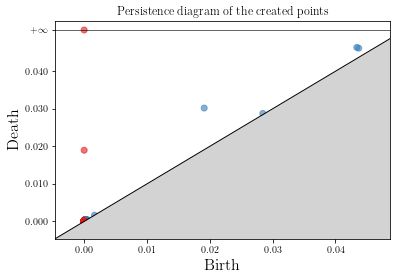

In [84]:
fig = gd.plot_persistence_diagram(dgmX)
fig.set_title("Persistence diagram of the created points")
plt.show()

In [85]:
landscape = gd.representations.Landscape(resolution=2000)
L = landscape.fit_transform([simplex_tree_X.persistence_intervals_in_dimension(1)])

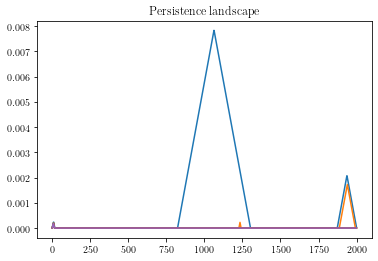

In [86]:
plt.plot(L[0][:2000])
plt.plot(L[0][2000:4000])
plt.plot(L[0][4000:6000])
plt.plot(L[0][6000:8000])
plt.plot(L[0][8000:10000])
plt.title("Persistence landscape")
plt.show()

In [88]:
silhoutte = gd.representations.Silhouette(resolution=2000, weight=lambda x: np.power(x[1]-x[0],1))
sh = silhoutte.fit_transform([simplex_tree_X.persistence_intervals_in_dimension(1)])

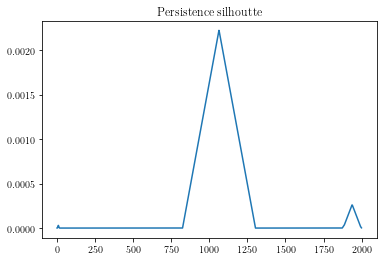

In [89]:
plt.plot(sh[0])
plt.title("Persistence silhoutte")
plt.show()

In [90]:
persistence_img = gd.representations.PersistenceImage(bandwidth=1e-4, weight=lambda x: x[1]**2, im_range=[0,.004,0,.004], resolution=[100,100])
pi = persistence_img.fit_transform([simplex_tree_X.persistence_intervals_in_dimension(1)])

Text(0.5, 1.0, 'Persistence Image')

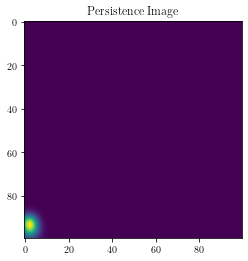

In [91]:
plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
plt.title("Persistence Image")

In [92]:
r = 4
Y = np.empty([num_points,2])
x, y = np.random.uniform(), np.random.uniform()
for i in range(num_points):
    Y[i,:] = [x, y]
    x = (Y[i,0] + r * Y[i,1] * (1-Y[i,1])) % 1.
    y = (Y[i,1] + r * x * (1-x)) % 1.

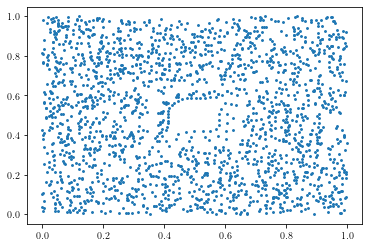

In [93]:
plt.scatter(Y[:,0], Y[:, 1], s=3.5)
plt.show()

In [95]:
# Persistence diagram
rips_complex_Y = gd.AlphaComplex(points = Y)
simplex_tree_Y = rips_complex_Y.create_simplex_tree()

In [96]:
dgmY = simplex_tree_Y.persistence()

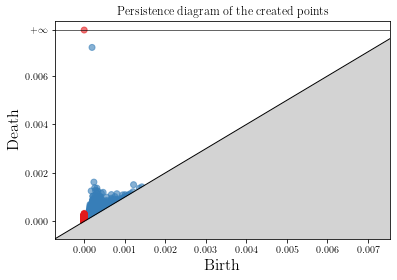

In [97]:
fig = gd.plot_persistence_diagram(dgmY)
fig.set_title("Persistence diagram of the created points")
plt.show()

In [98]:
PWG = gd.representations.PersistenceWeightedGaussianKernel(bandwidth=0.01, kernel_approx=None, weight=lambda x: np.arctan(np.power(x[1], 1)))
PWG.fit([simplex_tree_X.persistence_intervals_in_dimension(1)])
pwg = PWG.transform([simplex_tree_Y.persistence_intervals_in_dimension(1)])
print("PWG kernel is " + str(pwg[0][0]))

PSS = gd.representations.PersistenceScaleSpaceKernel(bandwidth=1.)
PSS.fit([simplex_tree_X.persistence_intervals_in_dimension(1)])
pss = PSS.transform([simplex_tree_Y.persistence_intervals_in_dimension(1)])
print("PSS kernel is " + str(pss[0][0]))

PF = gd.representations.PersistenceFisherKernel(bandwidth_fisher=.001, bandwidth=.001, kernel_approx=None)
PF.fit([simplex_tree_X.persistence_intervals_in_dimension(1)])
pf = PF.transform([simplex_tree_Y.persistence_intervals_in_dimension(1)])
print("PF kernel is " + str(pf[0][0]))

SW = gd.representations.SlicedWassersteinKernel(bandwidth=.1, num_directions=100)
SW.fit([simplex_tree_X.persistence_intervals_in_dimension(1)])
sw = SW.transform([simplex_tree_Y.persistence_intervals_in_dimension(1)])
print("SW kernel is " + str(sw[0][0]))

BD = gd.representations.BottleneckDistance(epsilon=.001)
BD.fit([simplex_tree_X.persistence_intervals_in_dimension(1)])
bd = BD.transform([simplex_tree_Y.persistence_intervals_in_dimension(1)])
print("Bottleneck distance is " + str(bd[0][0]))

WD = gd.representations.WassersteinDistance(internal_p=2, order=2)
WD.fit([simplex_tree_X.persistence_intervals_in_dimension(1)])
wd = WD.transform([simplex_tree_Y.persistence_intervals_in_dimension(1)])
print("Wasserstein distance is " + str(wd[0][0]))

PWG kernel is 3.076525688635273
PSS kernel is 0.0018058716683526654
PF kernel is 0.5045131676047937
SW kernel is 0.5888831013806343
Bottleneck distance is 0.004600972121688301
Wasserstein distance is 0.01050817015796913


In [99]:
num_diag_per_class = 10

dgms, labs = [], []
for idx, radius in enumerate([2.5, 3.5, 4., 4.1, 4.3]):
    for _ in range(num_diag_per_class):
        labs.append(idx)
        X = np.empty([num_points,2])
        x, y = np.random.uniform(), np.random.uniform()
        for i in range(num_points):
            X[i,:] = [x, y]
            x = (X[i,0] + radius * X[i,1] * (1-X[i,1])) % 1.
            y = (X[i,1] + radius * x * (1-x)) % 1.
        ac = gd.AlphaComplex(points=X).create_simplex_tree(max_alpha_square=1e12)
        dgm = ac.persistence()
        dgms.append(ac.persistence_intervals_in_dimension(1))

In [111]:
test_size            = 0.2
perm                 = np.random.permutation(len(labs))
limit                = int(test_size * len(labs))
test_sub, train_sub  = perm[:limit], perm[limit:]
train_labs           = np.array(labs)[train_sub]
test_labs            = np.array(labs)[test_sub]
train_dgms           = [dgms[i] for i in train_sub]
test_dgms            = [dgms[i] for i in test_sub]

[[5.41979742e-06 5.50354396e-06]
 [7.71930411e-06 7.77778183e-06]
 [7.88215587e-06 7.97666689e-06]
 ...
 [6.51840642e-03 6.64555907e-03]
 [2.17657864e-04 6.67977100e-03]
 [1.78048215e-04 8.77010534e-03]]
47


In [101]:
from sklearn.preprocessing   import MinMaxScaler
from sklearn.pipeline        import Pipeline
from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier

# Definition of pipeline
pipe = Pipeline([("Separator", gd.representations.DiagramSelector(limit=np.inf, point_type="finite")),
                 ("Scaler",    gd.representations.DiagramScaler(scalers=[([0,1], MinMaxScaler())])),
                 ("TDA",       gd.representations.PersistenceImage()),
                 ("Estimator", SVC())])

# Parameters of pipeline. This is the place where you specify the methods you want to use to handle diagrams
param =    [
            {"Scaler__use":         [True],
             "TDA":                 [gd.representations.PersistenceImage()], 
             "TDA__resolution":     [ [5,5], [6,6] ],
             "TDA__bandwidth":      [0.01, 0.1, 1.0, 10.0],
             "Estimator":           [SVC()]},
            
            {"Scaler__use":         [True],
             "TDA":                 [gd.representations.Landscape()], 
             "TDA__resolution":     [100],
             "Estimator":           [RandomForestClassifier()]},
           
            {"Scaler__use":         [False],
             "TDA":                 [gd.representations.BottleneckDistance()], 
             "TDA__epsilon":        [0.1], 
             "Estimator":           [KNeighborsClassifier(metric="precomputed")]}
           ]

In [107]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(pipe, param, cv=3)

In [108]:
model = model.fit(train_dgms, train_labs)

In [109]:
print(model.best_params_)

{'Estimator': RandomForestClassifier(), 'Scaler__use': True, 'TDA': Landscape(), 'TDA__resolution': 100}


In [110]:
print("Train accuracy = " + str(model.score(train_dgms, train_labs)))
print("Test accuracy  = " + str(model.score(test_dgms,  test_labs)))

Train accuracy = 1.0
Test accuracy  = 0.5
